In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.svm import LinearSVC
from sklearn.metrics import *
from sklearn.preprocessing import scale,LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import math
from time import time
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wdbc.data.txt",sep=",",header=None)

In [3]:
def df_splitor(data):
    df_M=data.loc[(data[1]=="M")]
    df_B=data.loc[(data[1]=="B")]
    df_M_train, df_M_test,= train_test_split(df_M, test_size=0.2)
    df_B_train, df_B_test,= train_test_split(df_B, test_size=0.2)
    df_train=pd.concat([df_M_train,df_B_train],axis=0)
    df_test=pd.concat([df_M_test,df_B_test],axis=0)
    return df_train,df_test

In [4]:
def x_y_split(data):
    columns = data.columns.tolist() # get the columns
    x_col = columns[2:]
    y_col = columns[1]
    X = data[x_col]
    Y = data[y_col]
    return X,Y

In [224]:
def trans_to_dig(data):
    data=data.map({"B":0,"M":1})
    return data

# b i:

In [297]:
def L1_penalized_SVM(data):
    parameters = {"C": [math.exp(i) for i in range(-5,5)]}
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        train,test=df_splitor(data)
        X_train,Y_train = x_y_split(train)
        X_train = scale(X_train)
        Y_train=trans_to_dig(Y_train)
        X_test,Y_test= x_y_split(test)
        X_test = scale(X_test)
        Y_test=trans_to_dig(Y_test)
        svc = LinearSVC(penalty="l1",dual=False,random_state=np.random.random_integers(50))
        clf = GridSearchCV(svc, parameters, cv=5)
        clf.fit(X_train, Y_train)
        svc = clf.best_estimator_
        train_pre=clf.predict(X_train)
        test_pre= clf.predict(X_test)
        loa.append(accuracy_score(y_true=Y_train,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            fpr, tpr, thresholds = roc_curve(Y_train, clf.decision_function(X_train))
            logit_roc_auc = roc_auc_score(Y_train, clf.predict(X_train))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            fpr, tpr, thresholds = roc_curve(Y_test, clf.decision_function(X_test))
            logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result,loa

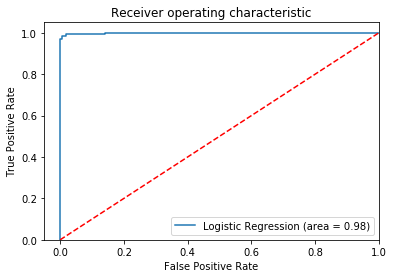

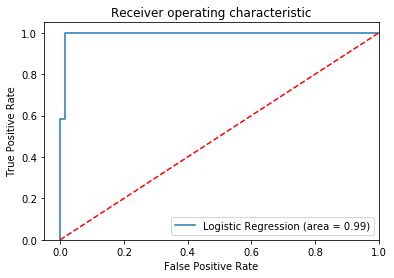

,Average Accuracy,Average F1-Score,Average Precision,Average Recall,Average AUC
Train,0.983480,0.977478,0.990506,0.964892,0.979697
Test,0.973043,0.963091,0.980299,0.947287,0.967856


In [298]:
result,loa=L1_penalized_SVM(data=df)
display(result)

In [108]:
def L1_penalized_SVM_semi(data):
    parameters = {"C": [math.exp(i) for i in range(-5,5)]}
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        print(i)
        train,test=df_splitor(data)
        # split labeled and unlabeled data
        label,unlable=train_test_split(train,test_size=0.5)
        # preprocessing for labeled data
        X_train_label,Y_train_label = x_y_split(label)
        col_name=X_train_label.columns.tolist()
        X_train_label = scale(X_train_label)
        Y_train_label=trans_to_dig(Y_train_label)
        # preprocessing for unlabeled data
        X_train_unlabel,Y_train_unlabel=x_y_split(unlable)
        X_train_unlabel=X_train_unlabel.reset_index(drop=True)
        X_train_unlabel = scale(X_train_unlabel)
        Y_train_unlabel=trans_to_dig(Y_train_unlabel)
        Y_train_unlabel=Y_train_unlabel.reset_index(drop=True)
        # preprocessing for test data
        X_test,Y_test= x_y_split(test)
        X_test = scale(X_test)
        Y_test=trans_to_dig(Y_test)
        while len(X_train_unlabel)>0:
            # construct classifier
            svc = LinearSVC(penalty="l1",dual=False,random_state=np.random.random_integers(50))
            parameters = {"C": [math.exp(i) for i in range(-5,5)]}
            clf = GridSearchCV(svc, parameters, cv=5)
            clf.fit(X_train_label, Y_train_label)
            unlabel_dis=clf.decision_function(X_train_unlabel)
            unlabel_pre=clf.predict(X_train_unlabel)
            unlabel_dis_abs=pd.DataFrame({"distance":abs(unlabel_dis),"prediction":unlabel_pre})
            sorted_distance=unlabel_dis_abs.sort_values(by="distance",ascending=False)
            farest=sorted_distance.first_valid_index()
            sorted_distance.loc[farest]["prediction"]
            X_train_label=np.append(X_train_label,[X_train_unlabel[farest]],axis=0)
            Y_train_label=Y_train_label.append(pd.Series(sorted_distance.loc[farest]["prediction"]),ignore_index=True)
            X_train_unlabel=np.delete(X_train_unlabel,farest,0)
        train_pre=clf.predict(X_train_label)
        test_pre= clf.predict(X_test)
        loa.append(accuracy_score(y_true=Y_train_label,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train_label,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train_label,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train_label,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train_label,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            print(confusion_matrix(y_true=Y_train_label,y_pred=train_pre))
            fpr, tpr, thresholds = roc_curve(Y_train_label, clf.decision_function(X_train_label))
            logit_roc_auc = roc_auc_score(Y_train_label, clf.predict(X_train_label))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            print(confusion_matrix(y_true=Y_test,y_pred=test_pre))
            fpr, tpr, thresholds = roc_curve(Y_test, clf.decision_function(X_test))
            logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[[148   3]
 [  1 302]]


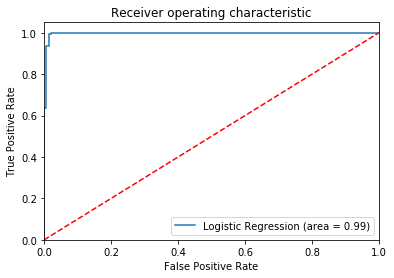

[[38  5]
 [ 0 72]]


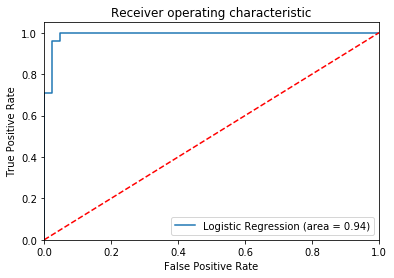

In [109]:
result=L1_penalized_SVM_semi(data=df)


# iii:

In [197]:
def find_label_for_cluster(X,Y,label):
    temp=pd.concat([X,Y,label],axis=1,)
    temp.columns=x.columns.tolist()+["True","Cluster"]
    cluster_to_label=dict()
    for i in temp["Cluster"].unique().tolist():
            temp_df = temp.loc[temp['Cluster'] == i]
            centroid=temp.mean().iloc[:30].values
            distance=pd.DataFrame(euclidean_distances(temp_df.drop(["True","Cluster"],1),
                                             centroid_0.reshape(1,-1)),columns=["Distance"])
            temp_df=pd.concat([temp_df,distance],axis=1)
            temp_df= temp_df.sort_values(by="Distance").iloc[:30,:]
            temp_df = temp_df.groupby("True").count()
            cluster_to_label[i]=temp_df['Cluster'].idxmax()
    return cluster_to_label

In [346]:
def k_means_iii(data):
    train,test=df_splitor(data)
    X_train,Y_train = x_y_split(train)
    X_train = scale(X_train)
    X_train=pd.DataFrame(X_train)
    Y_train=Y_train.reset_index(drop=True)
    Y_train=trans_to_dig(Y_train)
    X_test,Y_test= x_y_split(test)
    X_test = scale(X_test)
    X_test=pd.DataFrame(X_test)
    Y_test=Y_test.reset_index(drop=True)
    Y_test=trans_to_dig(Y_test)
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        k_mean=KMeans(n_clusters=2,random_state=np.random.random_integers(42))
        k_mean.fit(X_train)
        label=k_mean.labels_
        label=pd.DataFrame(label,columns=["Cluster"])
        cluster_to_label=find_label_for_cluster(X_train,Y_train,label)
        train_pre=pd.DataFrame(k_mean.predict(X_train))[0].map(cluster_to_label)
        test_pre=pd.DataFrame(k_mean.predict(X_test))[0].map(cluster_to_label)
        loa.append(accuracy_score(y_true=Y_train,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            print(confusion_matrix(y_true=Y_train,y_pred=train_pre))
            fpr, tpr, thresholds = roc_curve(Y_train, train_pre)
            logit_roc_auc = roc_auc_score(y_true=Y_train,y_score=train_pre)
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            print(confusion_matrix(y_true=Y_test,y_pred=test_pre))
            fpr, tpr, thresholds = roc_curve(Y_test, test_pre)
            logit_roc_auc = roc_auc_score(y_true=Y_test,y_score=test_pre)
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result,loa

[[274  11]
 [ 33 136]]


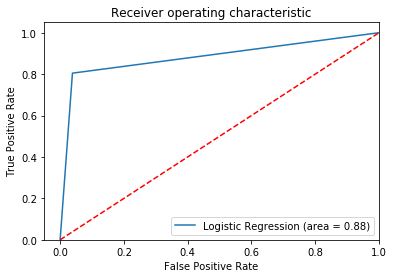

[[69  3]
 [ 4 39]]


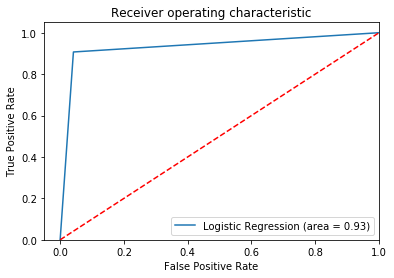

In [347]:
result_iii,loa=k_means_iii(df)

# iv:

In [312]:
def spectral_cluster(data):
    train,test=df_splitor(data)
    X_train,Y_train = x_y_split(train)
    X_train = scale(X_train)
    X_train=pd.DataFrame(X_train)
    Y_train=Y_train.reset_index(drop=True)
    Y_train=trans_to_dig(Y_train)
    X_test,Y_test= x_y_split(test)
    X_test = scale(X_test)
    X_test=pd.DataFrame(X_test)
    Y_test=Y_test.reset_index(drop=True)
    Y_test=trans_to_dig(Y_test)
    loa=[]
    lof=[]
    lop=[]
    lor=[]
    loauc=[]
    loa_te=[]
    lof_te=[]
    lop_te=[]
    lor_te=[]
    loauc_te=[]
    for i in range(30):
        spc=SpectralClustering(n_clusters=2,random_state=np.random.random_integers(0,42))
        spc.fit(X_train)
        label=k_mean.labels_
        label=pd.DataFrame(label,columns=["Cluster"])
        cluster_to_label=find_label_for_cluster(X_train,Y_train,label)
        train_pre=pd.DataFrame(spc.fit_predict(X_train))[0].map(cluster_to_label)
        test_pre=pd.DataFrame(spc.fit_predict(X_test))[0].map(cluster_to_label)
        loa.append(accuracy_score(y_true=Y_train,y_pred=train_pre))
        loa_te.append(accuracy_score(y_true=Y_test,y_pred=test_pre))
        lof.append(f1_score(y_true=Y_train,y_pred=train_pre))
        lof_te.append(f1_score(y_true=Y_test,y_pred=test_pre))
        lop.append(precision_score(y_true=Y_train,y_pred=train_pre))
        lop_te.append(precision_score(y_true=Y_test,y_pred=test_pre))
        lor.append(recall_score(y_true=Y_train,y_pred=train_pre))
        lor_te.append(recall_score(y_true=Y_test,y_pred=test_pre))
        loauc.append(roc_auc_score(y_true=Y_train,y_score=train_pre))
        loauc_te.append(roc_auc_score(y_true=Y_test,y_score=test_pre))
        if i == 29:
            #train:
            print(confusion_matrix(y_true=Y_train,y_pred=train_pre))
            fpr, tpr, thresholds = roc_curve(Y_train, train_pre)
            logit_roc_auc = roc_auc_score(y_true=Y_train,y_score=train_pre)
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
            #test:
            print(confusion_matrix(y_true=Y_test,y_pred=test_pre))
            fpr, tpr, thresholds = roc_curve(Y_test, test_pre)
            logit_roc_auc = roc_auc_score(y_true=Y_test,y_score=test_pre)
            plt.figure()
            plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([-0.05, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic')
            plt.legend(loc="lower right")
            plt.savefig('Log_ROC')
            plt.show()
    tr_avg_acc=np.mean(loa)
    te_avg_acc=np.mean(loa_te)
    tr_avg_f1=np.mean(lof)
    te_avg_f1=np.mean(lof_te)
    tr_avg_pre=np.mean(lop)
    te_avg_pre=np.mean(lop_te)
    tr_avg_recall=np.mean(lor)
    te_avg_recall=np.mean(lor_te)
    tr_avg_auc=np.mean(loauc)
    te_avg_auc=np.mean(loauc_te)
    table={"Average Accuracy":[tr_avg_acc,te_avg_acc],"Average F1-Score":[tr_avg_f1,te_avg_f1],
          "Average Precision":[tr_avg_pre,te_avg_pre],"Average Recall":[tr_avg_recall,te_avg_recall],
           "Average AUC":[tr_avg_auc,te_avg_auc]}
    result=pd.DataFrame(table,index=["Train","Test"])
    return result,loa

[[285   0]
 [167   2]]


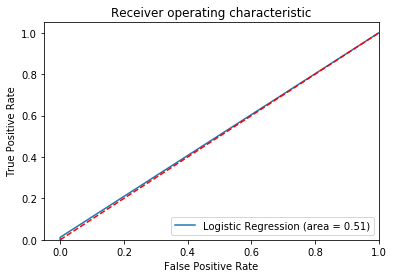

[[72  0]
 [41  2]]


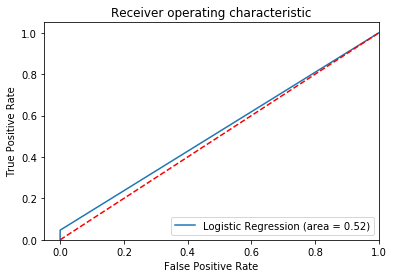

In [313]:
result,loa=spectral_cluster(df)